No license plate detected!


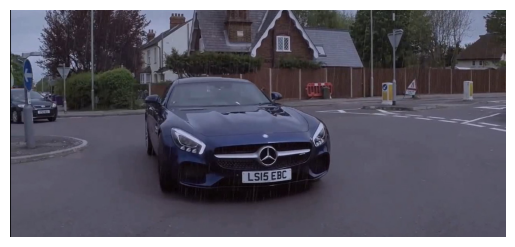

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO model
net = cv2.dnn.readNet(r"C:\Users\Harin\Downloads\YOLOv4-obj_1000.weights", r"C:\Users\Harin\visual studio\EOC_SPEED_DETECTION\models\yolov4_plate.cfg")

# Load class names
with open(r"C:\Users\Harin\visual studio\EOC_SPEED_DETECTION\models\obj.names.txt", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load image
image = cv2.imread(r"C:\users\harin\OneDrive\Pictures\Screenshots\car3.jpg")
height, width, _ = image.shape

# Convert image to blob for YOLO
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Perform forward pass
outs = net.forward(output_layers)

# Store detected bounding boxes
boxes, confidences, class_ids = [], [], []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:  # Confidence threshold
            center_x, center_y, w, h = (detection[0:4] * [width, height, width, height]).astype("int")

            # Convert center to top-left corner
            x, y = int(center_x - w / 2), int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Maximum Suppression (NMS) to filter overlapping boxes
# Apply Non-Maximum Suppression (NMS) to remove duplicate boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Ensure there are valid detections before looping
if len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
else:
    print("No license plate detected!")

# Save and display the image
cv2.imwrite("detected_plate.jpg", image)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

